In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("food_consumption.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [4]:
df.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [5]:
df.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [26]:
len(df["country"])

1430

`consumption` long form is  `supplied_for_consumption_kg_person_year`

`co2_emission` long form is `kg_co2_person_year`

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]),
 <a list of 130 Text xticklabel objects>)

<Figure size 1152x432 with 0 Axes>

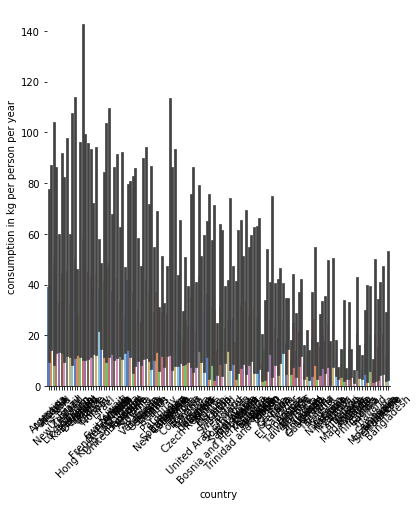

In [6]:
plt.figure(figsize=(16, 6))

g = sns.catplot(x="country", y="consumption", data=df, height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("consumption in kg per person per year")

plt.xticks(rotation=45)

In [7]:
df.loc[df["country"] == "Albania"].groupby("country")

In [121]:
def my_bar_plot(title: str, country: str, y_axis_column_name: str, y_axis_label: str):
    data = df.sort_values([y_axis_column_name], ascending=False).reset_index(drop=True)
    g = sns.catplot(y=y_axis_column_name, x="country", data=data.loc[data["country"] == country], hue="food_category", kind="bar", palette="muted", height=10)
    g.fig.suptitle(title)
    g.set_ylabels(y_axis_label)

    plt.xticks(rotation=45)

In [122]:
def plot_consumption(country: str):
    my_bar_plot(f"{country}'s consumption", country, "consumption", "consumption in kg per person per year")

In [123]:
def plot_co2_emmission(country: str):
    my_bar_plot(f"{country}'s emissions", country, "co2_emmission", "kg co2 per person per year")

In [126]:
def my_plots(country: str):
    plot_consumption(country)
    plot_co2_emmission(country)

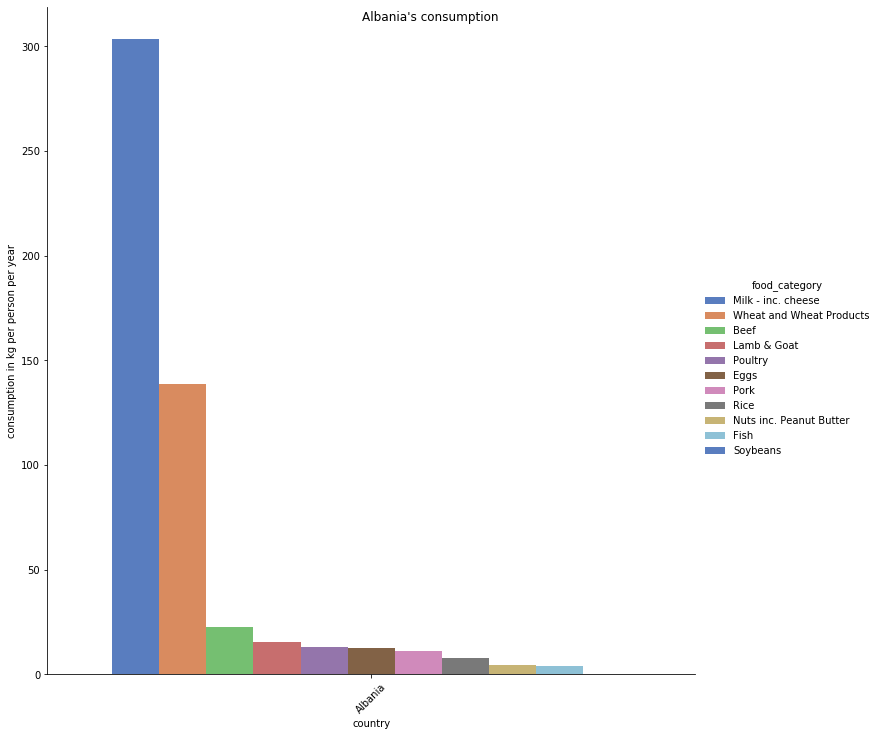

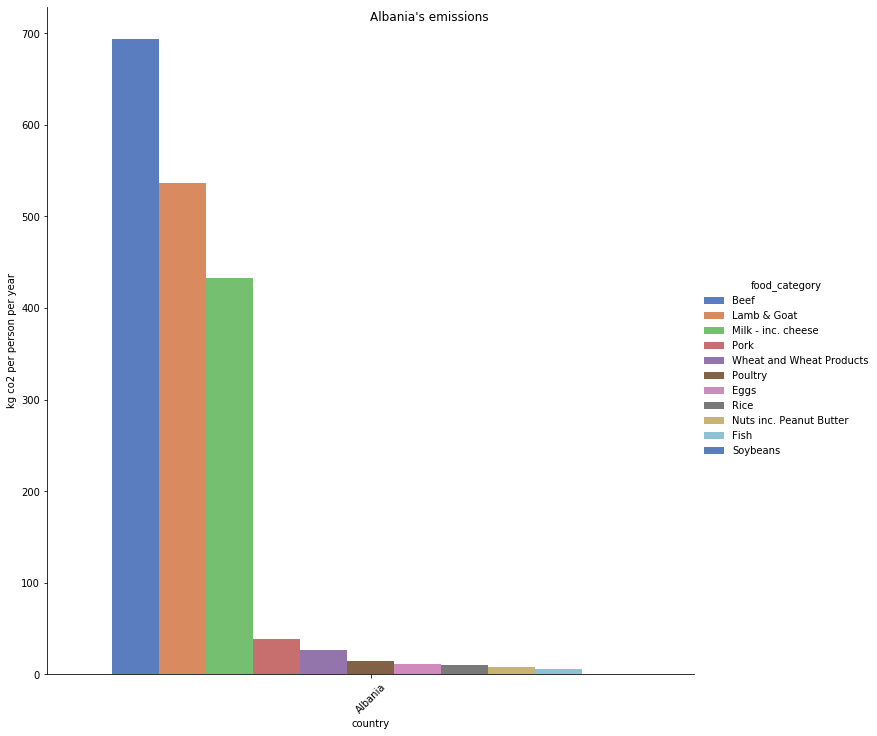

In [127]:
for country in sorted(df["country"].unique()):
    my_plots(country)
    break

T: Plot top countries by consumption


In [62]:
def top_n_countries_by(n: int, metric: str):
    return df.groupby("country").sum().sort_values(metric, ascending=False).head(n).reset_index()

In [63]:
top_20_countries_by_consumption_df = top_n_countries_by(20, "consumption")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

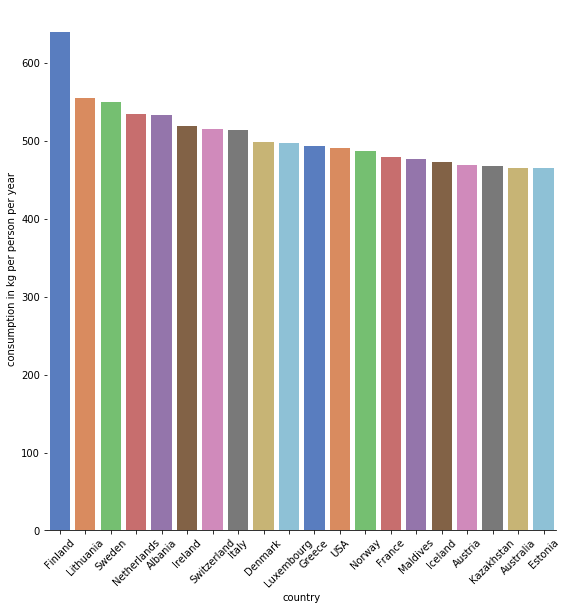

In [79]:
g = sns.catplot(x="country", y="consumption", data=top_20_countries_by_consumption_df, height=8, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("consumption in kg per person per year")

plt.xticks(rotation=45)

In [69]:
top_20_countries_by_c02_emmission_df = top_n_countries_by(20, "co2_emmission")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

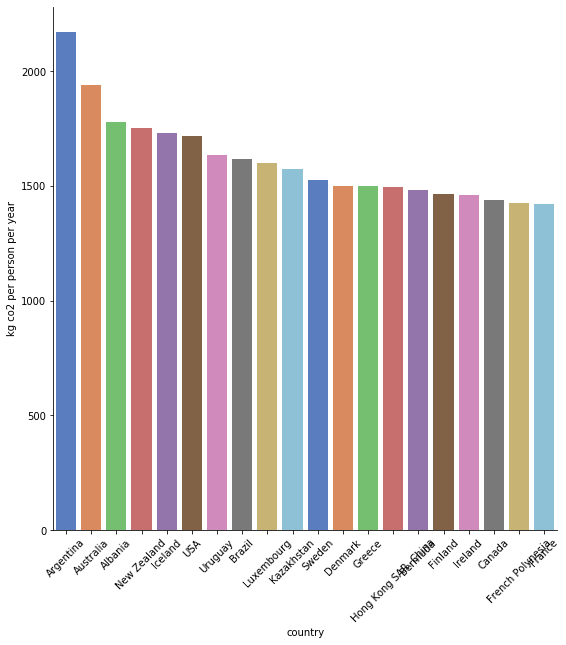

In [80]:
g = sns.catplot(x="country", y="co2_emmission", data=top_20_countries_by_c02_emmission_df, height=8, kind="bar", palette="muted")
g.set_ylabels("kg co2 per person per year")

plt.xticks(rotation=45)

T: Plot kg food divided by kg of co2

In [134]:
co2_emmissions_by_consumption = df.groupby("food_category").sum()
co2_emmissions_by_consumption["kg co2 per kg of consumption"] = co2_emmissions_by_consumption["co2_emmission"] / co2_emmissions_by_consumption["consumption"]
co2_emmissions_by_consumption = co2_emmissions_by_consumption.sort_values(["kg co2 per kg of consumption"], ascending=False).reset_index()
co2_emmissions_by_consumption

,food_category,consumption,co2_emmission,kg co2 per kg of consumption
0,Lamb & Goat,338.02,11837.38,35.019762
1,Beef,1576.04,48633.26,30.857884
2,Pork,2096.08,7419.11,3.539517
3,Nuts inc. Peanut Butter,537.84,951.99,1.770025
4,Fish,2247.32,3588.22,1.596666
5,Milk - inc. cheese,16350.71,23290.00,1.424403
6,Rice,3818.77,4886.91,1.279708
7,Poultry,2758.50,2963.16,1.074192
8,Eggs,1061.29,974.95,0.918646
9,Soybeans,111.87,50.35,0.450076


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

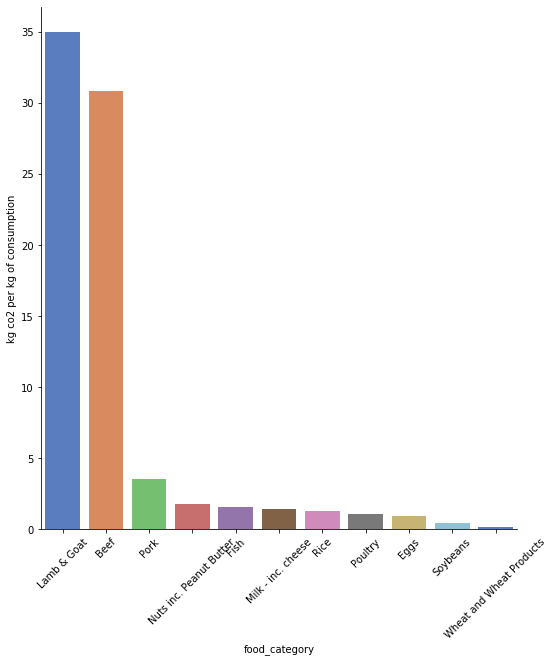

In [135]:
g = sns.catplot(x="food_category", y="kg co2 per kg of consumption", data=co2_emmissions_by_consumption, height=8, kind="bar", palette="muted")
plt.xticks(rotation=45)